# data load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white',context='talk')

In [2]:
data=pd.read_csv('app_store.csv')
data.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price
0,123 Kids Fun MUSIC - Kids Music Educational Games,GAME_MUSIC,4.083333,36,"1,000+",22M,$1.99
1,LetterSchool - Block Letters,GAME_EDUCATIONAL,4.181092,751,"10,000+",79M,$6.99
2,Tynker for Schools,GAME_EDUCATIONAL,4.000000,33,"1,000+",33M,$4.99
3,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.500000,22,"1,000+",44M,$5.99
4,Toddler Sing and Play 2 Pro,GAME_MUSIC,4.065041,246,"10,000+",20M,$1.99


# data browse

In [3]:
def datainfo(df):
    return pd.DataFrame([(col,df[col].nunique(),df[col].isna().sum(),df[col].dtype,
                         df[col].unique()[:5]) for col in df.columns],
                        columns=['name','nunique','missing','dtype','values :5'])

datainfo(data)

,name,nunique,missing,dtype,values :5
0,App Name,1695,0,object,[123 Kids Fun MUSIC - Kids Music Educational G...
1,Category,46,0,object,"[GAME_MUSIC, GAME_EDUCATIONAL, EDUCATION, BOOK..."
2,Rating,1449,0,float64,"[4.083333492, 4.181091785, 4.0, 4.5, 4.0650405..."
3,Reviews,1069,0,int64,"[36, 751, 33, 22, 246]"
4,Installs,15,0,object,"[1,000+, 10,000+, 5,000+, 100,000+, 1,000,000+]"
5,Size,278,0,object,"[22M, 79M, 33M, 44M, 20M]"
6,Price,83,0,object,"[$1.99, $6.99, $4.99, $5.99, $3.99]"


# data cleaning

In [4]:
data['Installs']=data['Installs'].apply(lambda x:x[:-1]).str.replace(',','').astype(float)
data['Size']=data['Size'].apply(lambda x:x[:-1]).str.replace(',','').astype(float)
data['Price']=data['Price'].apply(lambda x:x[1:]).astype(float)

# data eda

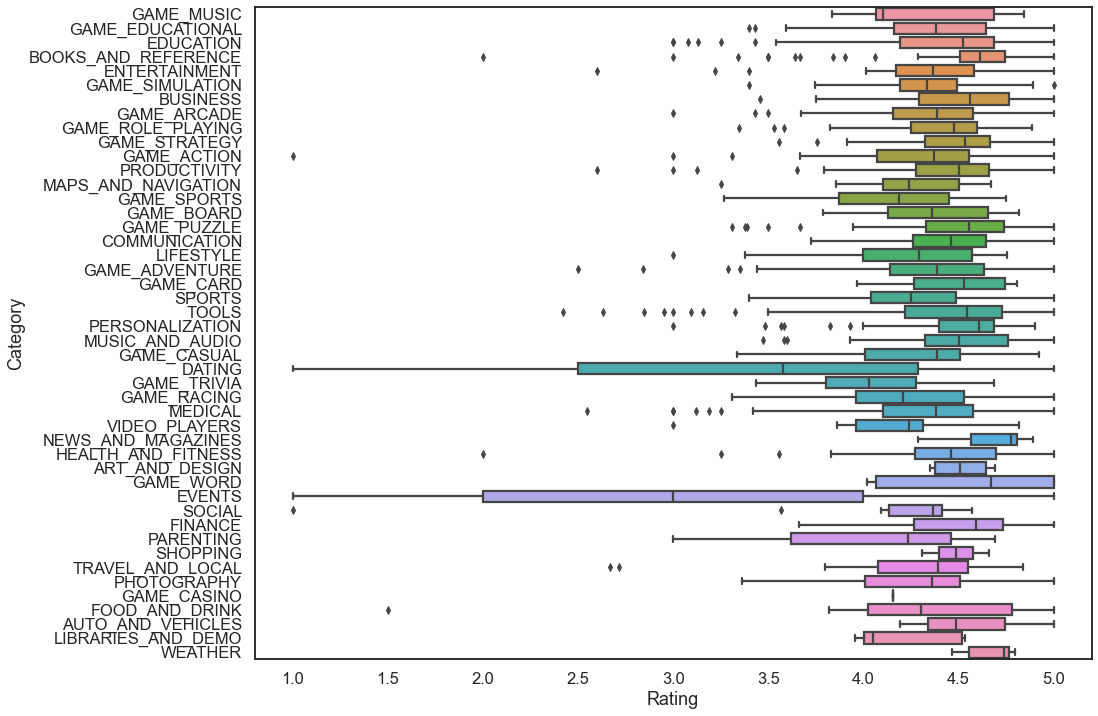

In [5]:
def box():
    plt.figure(figsize=(15,12))
    sns.boxplot(y='Category',x='Rating',data=data)
box()

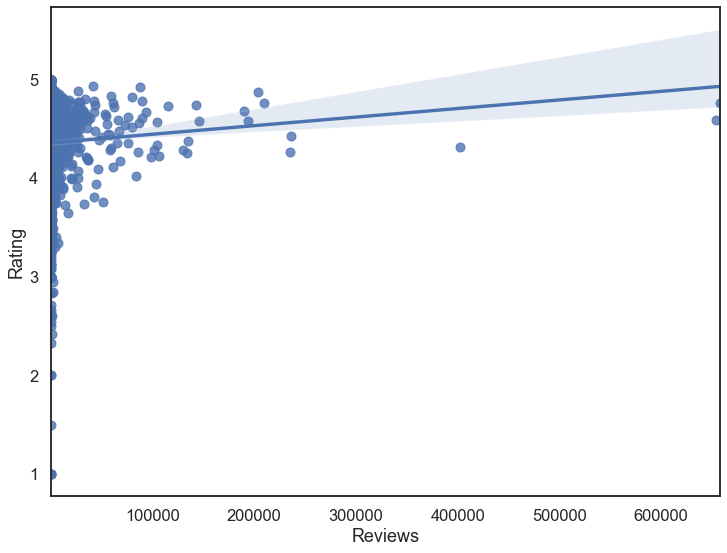

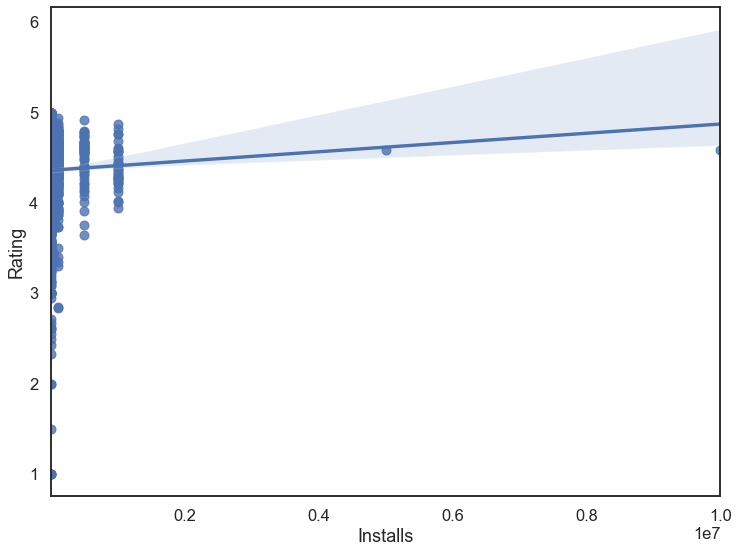

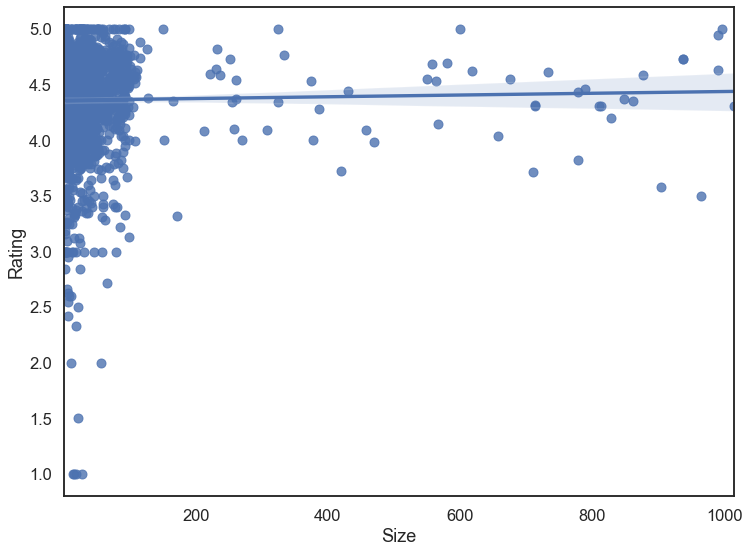

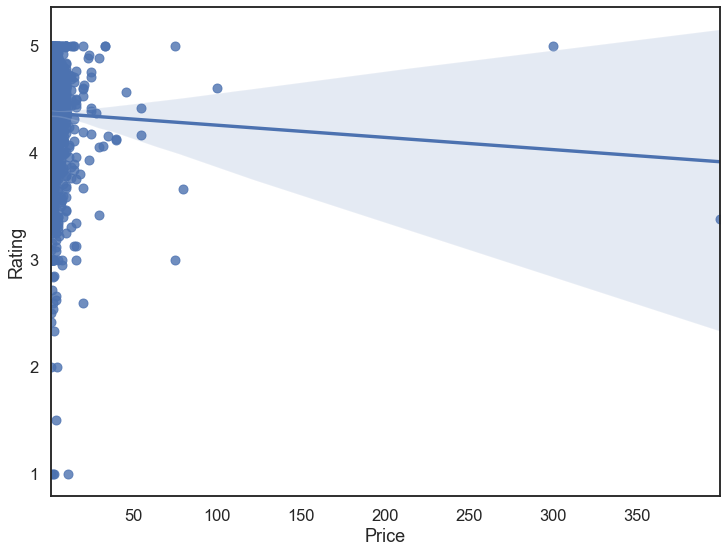

In [7]:
def plot():
    cols=['Reviews','Installs','Size','Price']
    for col in cols:
        plt.figure(figsize=(12,9))
        sns.regplot(y='Rating',x=col,data=data)
        plt.show()
plot()

# data predict

In [7]:
data.iloc[[250,532,1664],:]

,App Name,Category,Rating,Reviews,Installs,Size,Price
250,Five Nights at Freddy's 4,GAME_ACTION,4.591452,21782,100000.0,45.0,2.99
532,PAW Patrol Pups to the Rescue,GAME_ADVENTURE,2.840887,1037,100000.0,25.0,1.99
1664,My Town : Farm,GAME_EDUCATIONAL,4.139423,208,10000.0,68.0,2.99


1번 특징   

액션게임 시리즈 가격있음.  

2번 특징  

어드벤쳐게임 레이팅 낮음 가격있음.  
찾아보니 강아지가 사람역할을 하는 게임.

3번 특징  

교육게임 레이팅 높은데 리뷰없음. 가격있음.  

In [8]:
sub_=data[data['Category']=='GAME_EDUCATIONAL']
sub_[(sub_['Price']<20)&(sub_['Size']<500)]

,App Name,Category,Rating,Reviews,Installs,Size,Price
1,LetterSchool - Block Letters,GAME_EDUCATIONAL,4.181092,751,10000.0,79.0,6.99
2,Tynker for Schools,GAME_EDUCATIONAL,4.000000,33,1000.0,33.0,4.99
92,Wonderland : Beauty & Beast,GAME_EDUCATIONAL,3.916667,108,1000.0,61.0,2.99
208,Dr. Panda School,GAME_EDUCATIONAL,4.514528,826,50000.0,46.0,3.99
215,Pango Imaginary Car,GAME_EDUCATIONAL,4.175000,80,1000.0,20.0,2.99
...,...,...,...,...,...,...,...
1645,Cricket Kids: Opposites,GAME_EDUCATIONAL,4.533333,30,1000.0,23.0,1.99
1662,My Town : School,GAME_EDUCATIONAL,4.290000,700,10000.0,64.0,2.99
1663,My Little Princess : Stores,GAME_EDUCATIONAL,4.279817,218,10000.0,60.0,2.99
1664,My Town : Farm,GAME_EDUCATIONAL,4.139423,208,10000.0,68.0,2.99


1번 추천  

34번 Five Nights at Freddy's   
252번 Five Nights at Freddy's: SL	
652번 Five Nights at Freddy's 3	

2번 추천  

401번 Dr. Panda Firefighters  
723번 Dinosaur Rescue  
1659번 Dinosaur Digger 3  

3번 추천   

787번 My Town : Pets  
1194번 My Town : Fire station Rescue  
1255번 My Town : Beauty Contest  
1287번 My Town : Car wash fix & drive  
1330번 My Town : Beauty Spa Saloon
1348번 My Town : Wedding
1662번 My Town : School